<a href="https://colab.research.google.com/github/Manikantaamanchi424/University-Result-Analysis-System/blob/main/UniversityResultAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!

🏆 Subject-wise Toppers:
Science: Dunn (100 marks)
English: Davidde (100 marks)
History: Drusi (100 marks)
Maths: Ilaire (100 marks)

📊 Overall Pass Percentage: 52.00%

🌟 Best Performing Subject: Maths

🏅 Top 5 Students:
         Name Section  Total  Percentage Grade
10       Dunn       C    361       90.25    A+
120  Patrizia       A    356       89.00     A
68        Nil       A    347       86.75     A
91      Daffi       A    341       85.25     A
200    Ruddie       B    333       83.25     A

🏫 Section-wise Average Performance:
         Science  English  History  Maths   Total
Section                                          
A          53.87    50.54    51.92  51.91  208.25
B          54.06    47.32    53.32  55.27  209.96
C          47.10    46.35    51.67  52.03  197.15


<Figure size 1000x600 with 0 Axes>

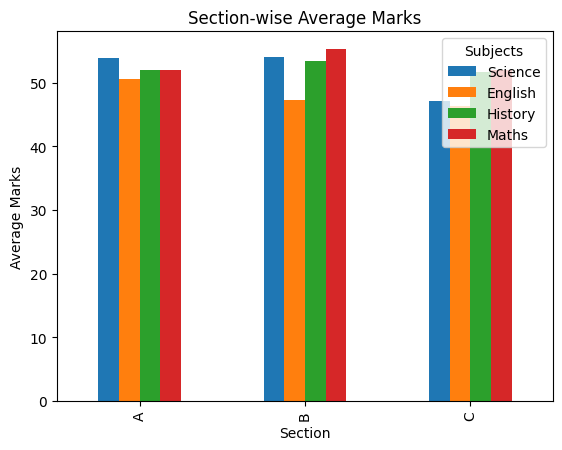


👩‍🎓👨‍🎓 Gender-wise Average Percentage:
Gender
Female    50.65
Male      51.64
Name: Percentage, dtype: float64


/tmp/ipython-input-1522288010.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_perf.index, y=gender_perf.values, palette='Set2')


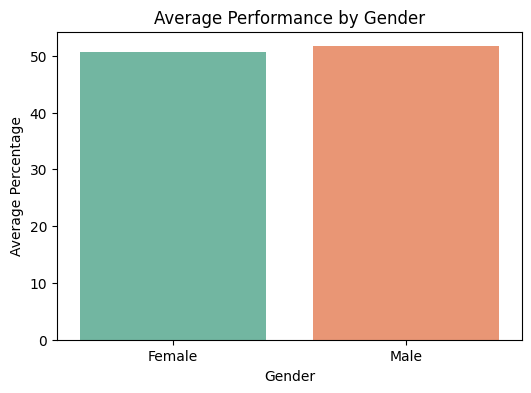

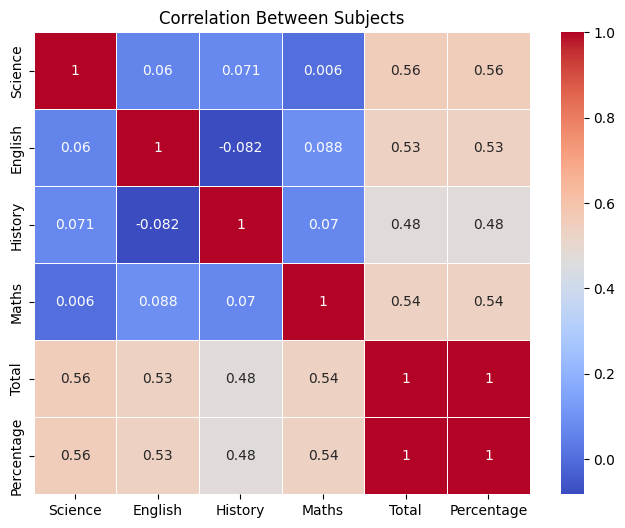


✅ Enhanced analysis complete! Saved as 'University_Result_Analysis_Report_Enhanced.csv'.


In [7]:
# Student Result Analysis System (Enhanced University Version)
# Developed by: Mani Kanta
# Tools: Python, Pandas, Matplotlib, Seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------
# 1. Load the dataset
# ----------------------------
df = pd.read_csv("marksheet.csv")

print("✅ Dataset loaded successfully!")

# ----------------------------
# 2. Subject columns
# ----------------------------
subject_columns = ['Science', 'English', 'History', 'Maths']

# ----------------------------
# 3. Compute totals & grades
# ----------------------------
df['Total'] = df[subject_columns].sum(axis=1)
df['Percentage'] = (df['Total'] / (len(subject_columns) * 100)) * 100

def assign_grade(pct):
    if pct >= 90:
        return 'A+'
    elif pct >= 80:
        return 'A'
    elif pct >= 70:
        return 'B'
    elif pct >= 60:
        return 'C'
    elif pct >= 50:
        return 'D'
    else:
        return 'F'

df['Grade'] = df['Percentage'].apply(assign_grade)
df['Rank'] = df['Total'].rank(ascending=False, method='min').astype(int)
df = df.sort_values(by='Rank')

# ----------------------------
# 4. Key Insights
# ----------------------------

# Subject-wise toppers
print("\n🏆 Subject-wise Toppers:")
for subject in subject_columns:
    topper = df.loc[df[subject].idxmax()]
    print(f"{subject}: {topper['Name']} ({topper[subject]} marks)")

# Pass percentage
passed = len(df[df['Percentage'] >= 50])
total = len(df)
pass_percentage = (passed / total) * 100
print(f"\n📊 Overall Pass Percentage: {pass_percentage:.2f}%")

# Best performing subject (by average score)
best_subject = df[subject_columns].mean().idxmax()
print(f"\n🌟 Best Performing Subject: {best_subject}")

# Top 5 Students
print("\n🏅 Top 5 Students:")
print(df[['Name', 'Section', 'Total', 'Percentage', 'Grade']].head(5))

# ----------------------------
# 5. Section-wise Performance
# ----------------------------
section_perf = df.groupby('Section')[subject_columns + ['Total']].mean().round(2)
print("\n🏫 Section-wise Average Performance:")
print(section_perf)

plt.figure(figsize=(10,6))
section_perf[subject_columns].plot(kind='bar')
plt.title("Section-wise Average Marks")
plt.ylabel("Average Marks")
plt.xlabel("Section")
plt.legend(title="Subjects")
plt.show()

# ----------------------------
# 6. Gender-based Analysis
# ----------------------------
gender_perf = df.groupby('Gender')['Percentage'].mean().round(2)
print("\n👩‍🎓👨‍🎓 Gender-wise Average Percentage:")
print(gender_perf)

plt.figure(figsize=(6,4))
sns.barplot(x=gender_perf.index, y=gender_perf.values, palette='Set2')
plt.title("Average Performance by Gender")
plt.ylabel("Average Percentage")
plt.show()

# ----------------------------
# 7. Correlation Heatmap
# ----------------------------
plt.figure(figsize=(8,6))
sns.heatmap(df[subject_columns + ['Total', 'Percentage']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Between Subjects")
plt.show()

# ----------------------------
# 8. Save final report
# ----------------------------
df.to_csv("University_Result_Analysis_Report_Enhanced.csv", index=False)
print("\n✅ Enhanced analysis complete! Saved as 'University_Result_Analysis_Report_Enhanced.csv'.")
